In [1]:
%matplotlib inline
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN
from sklearn import datasets, preprocessing
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
from scipy.spatial.distance import euclidean

In [54]:
%pylab inline
pylab.rcParams['figure.figsize'] = (12, 6)

Populating the interactive namespace from numpy and matplotlib


## Usar dataset da lista 12

In [2]:
df = pd.read_csv('data_1024.csv', delim_whitespace=True)

In [3]:
df = df[['Distance_Feature', 'Speeding_Feature']]

In [4]:
df.head(10)

,Distance_Feature,Speeding_Feature
0,71.24,28.0
1,52.53,25.0
2,64.54,27.0
3,55.69,22.0
4,54.58,25.0
5,41.91,10.0
6,58.64,20.0
7,52.02,8.0
8,31.25,34.0
9,44.31,19.0


##  1. Fazer clusterização hierárquica (HC) usando os seguintes métodos e mostrando os dendrogramas para:
- Single
- Complete
- Average

#### Single

In [5]:
hc_single = linkage(df, method='single')

In [6]:
pd.DataFrame(hc_single, columns = ['idx1', 'idx2', 'dist', 'sample_count']).head(10)

,idx1,idx2,dist,sample_count
0,118.0,212.0,0.0,2.0
1,989.0,3163.0,0.0,2.0
2,1055.0,1870.0,0.0,2.0
3,1190.0,1913.0,0.0,2.0
4,111.0,1650.0,0.0,2.0
5,1128.0,3038.0,0.0,2.0
6,523.0,1428.0,0.0,2.0
7,1169.0,1629.0,0.0,2.0
8,1867.0,2619.0,0.0,2.0
9,2535.0,3080.0,0.0,2.0


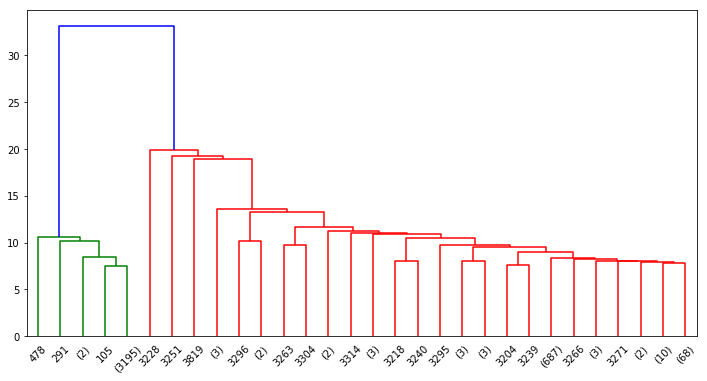

In [55]:
dendrogram(hc_single, truncate_mode='lastp')
plt.show()

#### Complete

In [8]:
hc_complete = linkage(df, method="complete")

In [9]:
pd.DataFrame(hc_complete, columns = ['idx1', 'idx2', 'dist', 'sample_count']).head(10)

,idx1,idx2,dist,sample_count
0,118.0,212.0,0.0,2.0
1,58.0,897.0,0.0,2.0
2,111.0,1650.0,0.0,2.0
3,1128.0,3038.0,0.0,2.0
4,887.0,2371.0,0.0,2.0
5,2725.0,2772.0,0.0,2.0
6,508.0,713.0,0.0,2.0
7,2445.0,2952.0,0.0,2.0
8,527.0,1027.0,0.0,2.0
9,1673.0,1954.0,0.0,2.0


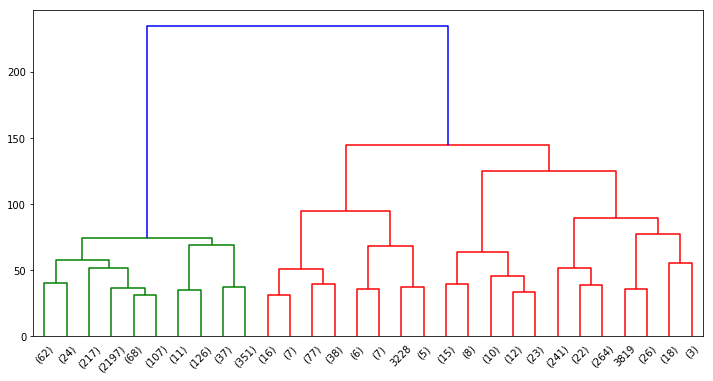

In [56]:
dendrogram(hc_complete, truncate_mode='lastp')
plt.show()

#### Average

In [11]:
hc_average = linkage(df, method="average")

In [12]:
pd.DataFrame(hc_average, columns = ['idx1', 'idx2', 'dist', 'sample_count']).head(10)

,idx1,idx2,dist,sample_count
0,118.0,212.0,0.0,2.0
1,1055.0,1870.0,0.0,2.0
2,1190.0,1913.0,0.0,2.0
3,1375.0,2417.0,0.0,2.0
4,1372.0,1924.0,0.0,2.0
5,2258.0,2651.0,0.0,2.0
6,2535.0,3080.0,0.0,2.0
7,1867.0,2619.0,0.0,2.0
8,1169.0,1629.0,0.0,2.0
9,523.0,1428.0,0.0,2.0


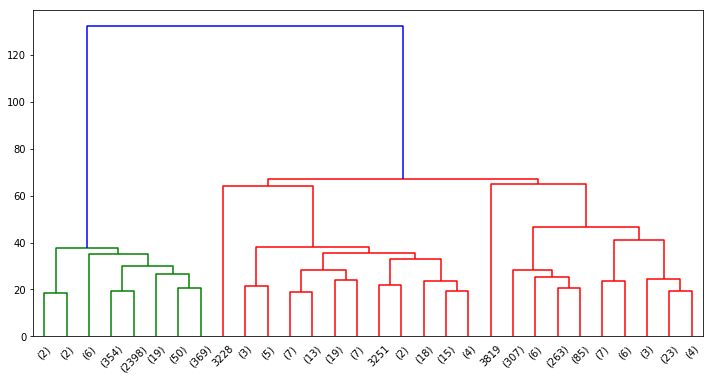

In [57]:
dendrogram(hc_average, truncate_mode='lastp')
plt.show()

## 2. Escolher uma clusterização hierárquica do item 1 e, a partir dela, escolher uma linha de corte e mostrar os clusters no gráfico.
 - A clusterização hierárquica escolhida foi a average, onde observa-se que os clusters na linha de corte(60) estão com a cor azul (ou seja, todo mundo que é maior ou igual a 60), e o restante estão com coloração diferente.

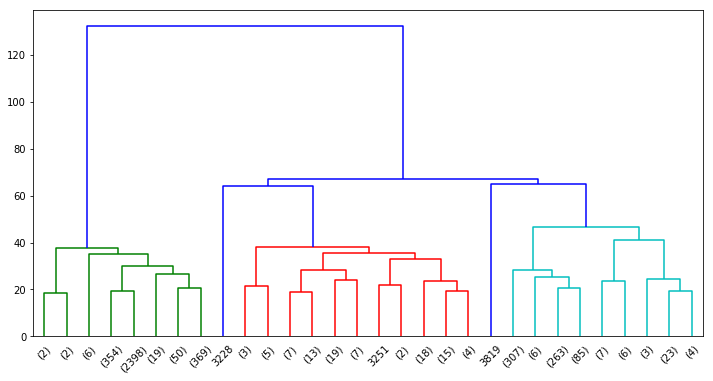

In [58]:
# Plotando o dendograma com um corte na linha 60
dendrogram(hc_average, truncate_mode='lastp', color_threshold=60)
plt.show()

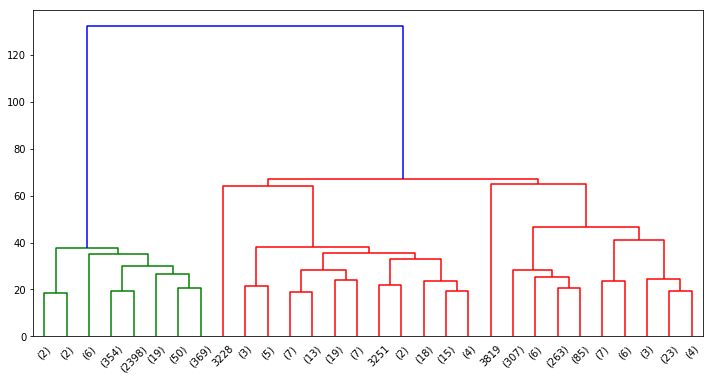

In [59]:
# Plotando o dendograma original usando o average
dendrogram(hc_average, truncate_mode='lastp')
plt.show()

## 3. Fazer clusterização DBSCAN com diferentes valores de eps e minPoints.

In [23]:
X = df.values

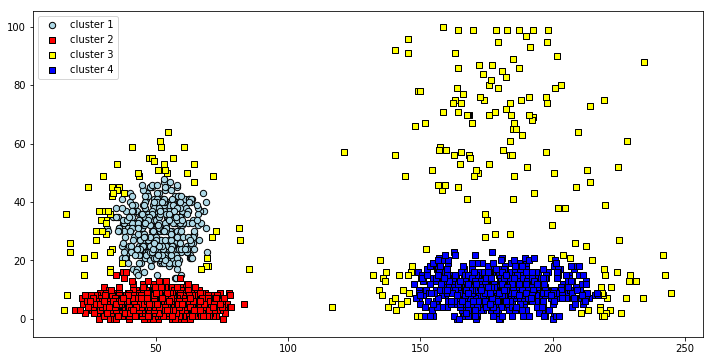

In [60]:
db_1 = DBSCAN(eps=5, min_samples=20, metric='euclidean')
y_db_1 = db_1.fit_predict(X)
plt.scatter(X[y_db_1 == 0, 0], X[y_db_1 == 0, 1],
            c='lightblue', marker='o', s=40,
            edgecolor='black', 
            label='cluster 1')
plt.scatter(X[y_db_1 == 1, 0], X[y_db_1 == 1, 1],
            c='red', marker='s', s=40,
            edgecolor='black', 
            label='cluster 2')
plt.scatter(X[y_db_1 == -1, 0], X[y_db_1 == -1, 1],
            c='yellow', marker='s', s=40,
            edgecolor='black', 
            label='cluster 3')
plt.scatter(X[y_db_1 == 2, 0], X[y_db_1 == 2, 1],
            c='blue', marker='s', s=40,
            edgecolor='black', 
            label='cluster 4')

plt.legend()
plt.show()

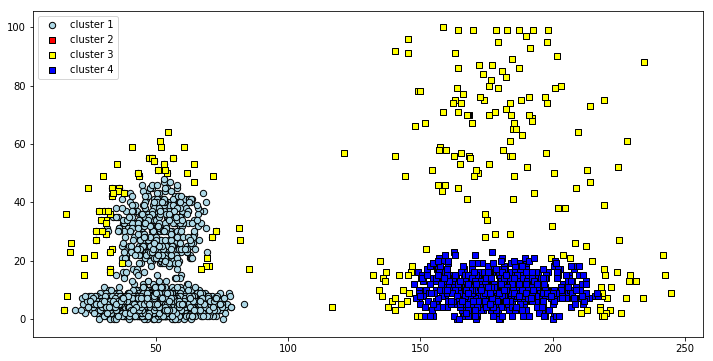

In [61]:
db_2 = DBSCAN(eps=5, min_samples=5, metric='euclidean')
y_db_2 = db_2.fit_predict(X)
plt.scatter(X[y_db_2 == 0, 0], X[y_db_2 == 0, 1],
            c='lightblue', marker='o', s=40,
            edgecolor='black', 
            label='cluster 1')
plt.scatter(X[y_db_2 == 1, 0], X[y_db_2 == 1, 1],
            c='red', marker='s', s=40,
            edgecolor='black', 
            label='cluster 2')
plt.scatter(X[y_db_1 == -1, 0], X[y_db_1 == -1, 1],
            c='yellow', marker='s', s=40,
            edgecolor='black', 
            label='cluster 3')
plt.scatter(X[y_db_1 == 2, 0], X[y_db_1 == 2, 1],
            c='blue', marker='s', s=40,
            edgecolor='black', 
            label='cluster 4')

plt.legend()
plt.show()

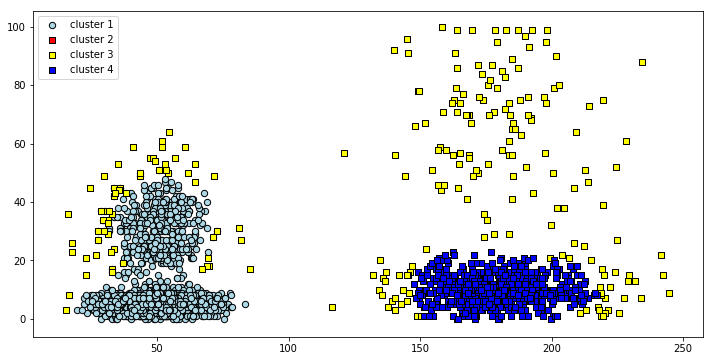

In [62]:
db_3 = DBSCAN(eps=5, min_samples=10, metric='euclidean')
y_db_3 = db_3.fit_predict(X)
plt.scatter(X[y_db_3 == 0, 0], X[y_db_3 == 0, 1],
            c='lightblue', marker='o', s=40,
            edgecolor='black', 
            label='cluster 1')
plt.scatter(X[y_db_3 == 1, 0], X[y_db_3 == 1, 1],
            c='red', marker='s', s=40,
            edgecolor='black', 
            label='cluster 2')
plt.scatter(X[y_db_1 == -1, 0], X[y_db_1 == -1, 1],
            c='yellow', marker='s', s=40,
            edgecolor='black', 
            label='cluster 3')
plt.scatter(X[y_db_1 == 2, 0], X[y_db_1 == 2, 1],
            c='blue', marker='s', s=40,
            edgecolor='black', 
            label='cluster 4')

plt.legend()
plt.show()

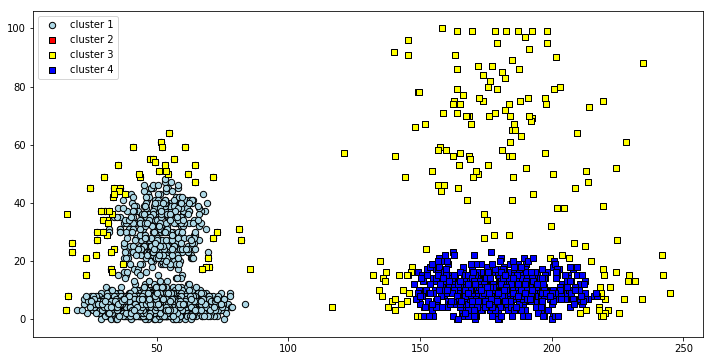

In [63]:
db_4 = DBSCAN(eps=10, min_samples=10, metric='euclidean')
y_db_4 = db_4.fit_predict(X)
plt.scatter(X[y_db_4 == 0, 0], X[y_db_4 == 0, 1],
            c='lightblue', marker='o', s=40,
            edgecolor='black', 
            label='cluster 1')
plt.scatter(X[y_db_4 == 1, 0], X[y_db_4 == 1, 1],
            c='red', marker='s', s=40,
            edgecolor='black', 
            label='cluster 2')
plt.scatter(X[y_db_1 == -1, 0], X[y_db_1 == -1, 1],
            c='yellow', marker='s', s=40,
            edgecolor='black', 
            label='cluster 3')
plt.scatter(X[y_db_1 == 2, 0], X[y_db_1 == 2, 1],
            c='blue', marker='s', s=40,
            edgecolor='black', 
            label='cluster 4')

plt.legend()
plt.show()

## 4. Escolher um resultado do item 3 e, a partir dele, mostrar os clusters no gráfico.

## 5. Questões conceituais

### 5.1 - Quais as diferenças entre feature selection e feature extraction? 
- Feature Selection: Essa técnica é usada para selecionar e remover recursos desnecessários do dataset, esse procedimento sempre deve ser realizado antes do modelo ser executado.

- Feature Extraction: Essa técnica é uma transformação feita nos dados com o intuito de apurar a precisão do algoritmo. Ex: Em uma data no formato dia/mês/ano normalmente esse dado seria melhor aproveitado pelo o algoritmo se isso fosse transformado apenas no dia, mês ou no ano.

### 5.2 - Dê exemplos de técnicas usadas para feature selection.
- Isso pode ser feito por diversas técnicas, algumas delas são: Regressão Linear, Árvores de Decisão, cálculo de pesos de importância (L1, L2), entre outras.

### 5.3 - Dê exemplos de técnicas usadas para feature extraction.
- Essa técnica está relacionada a redução de dimensionalidade. Técnicas gerais de redução de dimensionalidade são usadas, como: Redução de dimensionalidade multifatorial, Redução de dimensionalidade não linear, PCA do kernel, entre outras.

## 6. Use o iris dataset e a partir dele:

In [ ]:
X, y = datasets.load_iris(return_X_y=True)

#### 6.1 - Reduza a dimensionalidade para 2 dimensões usando PCA, e  mostre os pontos em um gráfico, onde cada classe é visualizada com uma cor diferente. 

In [ ]:
pca = PCA(n_components=2)
df_pca = pd.DataFrame(pca.fit_transform(X))
df_pca.head()

In [ ]:
plt.scatter(df_pca[y==0][0], df_pca[y==0][1], label='1º Classe', c='green')
plt.scatter(df_pca[y==1][0], df_pca[y==1][1], label='2º Classe', c='yellow')
plt.scatter(df_pca[y==2][0], df_pca[y==2][1], label='3º Classe', c='blue')

plt.legend()
plt.show()

#### 6.2 - Reduza a dimensionalidade para 2 dimensões usando LDA, e  mostre os pontos em um gráfico, onde cada classe é visualizada com uma cor diferente. 

In [ ]:
lda = LDA(n_components=2)
df_lda = pd.DataFrame(lda.fit_transform(X, y))
df_lda.head()

In [ ]:
plt.scatter(df_lda[y==0][0], df_lda[y==0][1], label='1º Classe', c='green')
plt.scatter(df_lda[y==1][0], df_lda[y==1][1], label='2º Classe', c='yellow')
plt.scatter(df_lda[y==2][0], df_lda[y==2][1], label='3º Classe', c='blue')

plt.legend()
plt.show()